## 第78讲 使用MTCNN识别人脸和眼部特征


## Python学习：https://www.ixigua.com/home/77346806707?utm_source=xiguastudio

## Python源文件及数据下载链接: https://github.com/rayc2020/LessonPythonCode

MTCNN (Multi-task Cascaded Convolutional Neural Networks) is an algorithm consisting of 3 stages, which detects the bounding boxes of faces in an image along with their 5 Point Face Landmarks

In [4]:
#https://anaconda.org/conda-forge/mtcnn
#conda install -c conda-forge mtcnn

import tensorflow as tf
tf.__version__

In [9]:
import cv2
cv2.__version__

'4.3.0'

In [5]:
import mtcnn

mtcnn.__version__

'0.1.0'

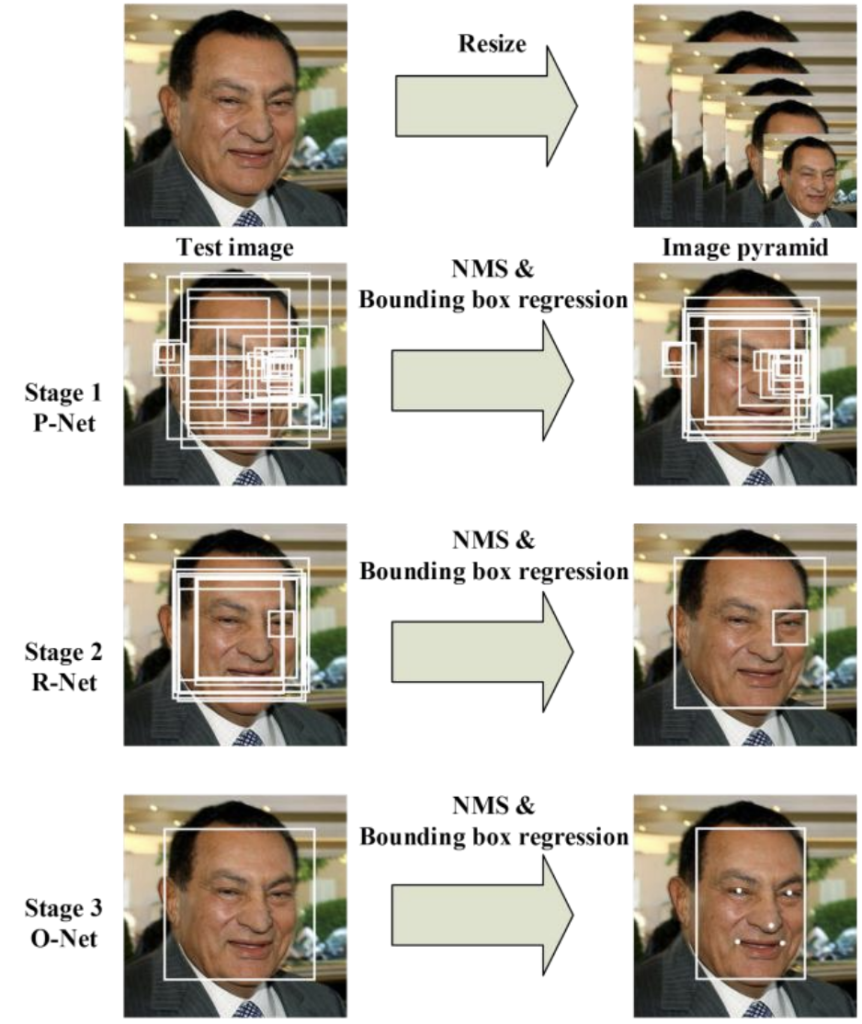

In [7]:
from IPython.display import Image
Image(filename='Lesson75-OpenCV/image_examples/Lesson78-Pipeline-for-the-Multi-Task-Cascaded-CNN.png')

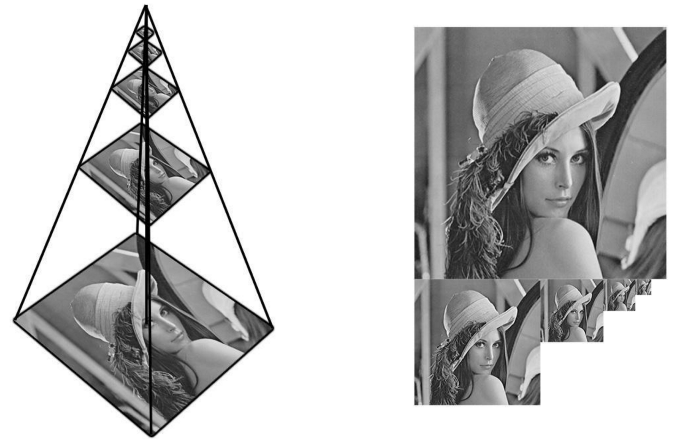

In [20]:
from IPython.display import Image
Image(filename='Lesson78-4.png')

Stage 1: The Proposal Network (P-Net)
This first stage is a fully convolutional network (FCN). The difference between a CNN and a FCN is that a fully convolutional network does not use a dense layer as part of the architechture. This Proposal Network is used to obtain candidate windows and their bounding box regression vectors

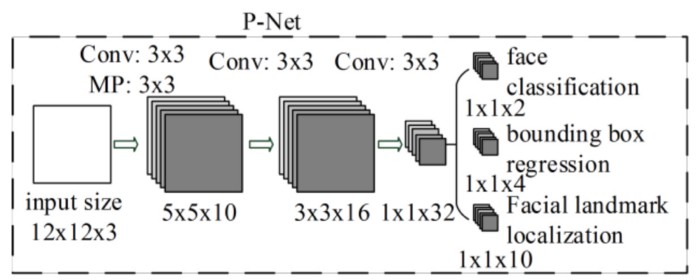

In [22]:
from IPython.display import Image
Image(filename='Lesson78-MTCNN1.jpeg')

Stage 2: The Refine Network (R-Net)
All candidates from the P-Net are fed into the Refine Network. Notice that this network is a CNN, not a FCN like the one before since there is a dense layer at the last stage of the network architecture. The R-Net further reduces the number of candidates, performs calibration with bounding box regression and employs non-maximum suppression (NMS) to merge overlapping candidates.

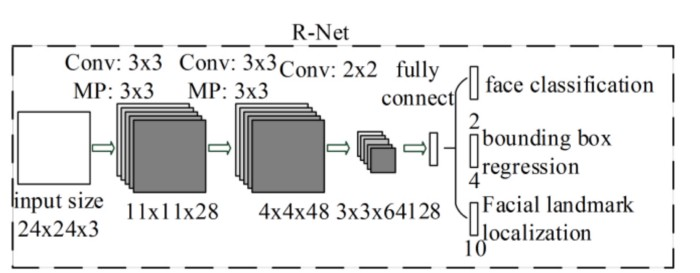

In [23]:
from IPython.display import Image
Image(filename='Lesson78-MTCNN2.jpeg')

Stage 3: The Output Network (O-Net)
This stage is similar to the R-Net, but this Output Network aims to describe the face in more detail and output the five facial landmarks’ positions for eyes, nose and mouth.

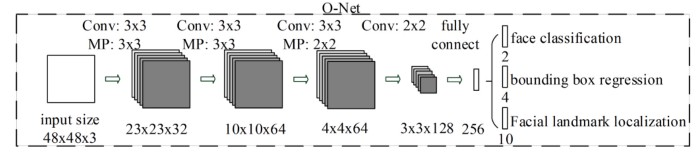

In [24]:
from IPython.display import Image
Image(filename='Lesson78-MTCNN3.jpeg')

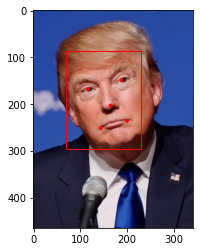

In [18]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN
from cv2 import imread
from cv2 import imshow
from cv2 import rectangle
 
# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot the image
	pyplot.imshow(data)
	# get the context for drawing boxes
	ax = pyplot.gca()
	# plot each box
	for result in result_list:
		# get coordinates
		x, y, width, height = result['box']
		# create the shape
		rect = Rectangle((x, y), width, height, fill=False, color='red')
		# draw the box
		ax.add_patch(rect)
		# draw the dots
		for key, value in result['keypoints'].items():
			# create and draw dot
			dot = Circle(value, radius=3, color='red')
			ax.add_patch(dot)
	# show the plot
	pyplot.show()
 
# load image from file
#filename='Lesson75-OpenCV/image_examples/Lesson75-team.jpg'
filename='Lesson75-OpenCV/image_examples/Lesson75-Trump.jpg'
pixels = imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)

In [20]:
import cv2
cap = cv2.VideoCapture(0)
#cap = cv2.cv2.VideoCapture(0, cv2.CAP_DSHOW)
detector = MTCNN()
while True: 
    #Capture frame-by-frame
    __, frame = cap.read()
    
    #Use MTCNN to detect faces
    result = detector.detect_faces(frame)
    if result != []:
        for person in result:
            bounding_box = person['box']
            keypoints = person['keypoints']
    
            cv2.rectangle(frame,
                          (bounding_box[0], bounding_box[1]),
                          (bounding_box[0]+bounding_box[2], bounding_box[1] + bounding_box[3]),
                          (0,155,255),
                          2)
    
            cv2.circle(frame,(keypoints['left_eye']), 2, (0,155,255), 2)
            cv2.circle(frame,(keypoints['right_eye']), 2, (0,155,255), 2)
            cv2.circle(frame,(keypoints['nose']), 2, (0,155,255), 2)
            cv2.circle(frame,(keypoints['mouth_left']), 2, (0,155,255), 2)
            cv2.circle(frame,(keypoints['mouth_right']), 2, (0,155,255), 2)
    #display resulting frame
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) &0xFF == ord('q'):
        break
#When everything's done, release capture
cap.release()
cv2.destroyAllWindows()